In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer

# For machine learning-based sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For lexicon-based sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [3]:
reviews = reviews.rename(columns={'Review': 'review_content'})
reviews.head()


,Id,review_content,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [4]:
display(reviews['review_content'].head())
reviews['review_content'].size

0                                 good and interesting
1    This class is very helpful to me. Currently, I...
2    like!Prof and TAs are helpful and the discussi...
3    Easy to follow and includes a lot basic and im...
4    Really nice teacher!I could got the point eazl...
Name: review_content, dtype: object

107018

In [5]:
from nltk.corpus import stopwords

# Remove HTML tags
reviews['review_content'] = reviews['review_content'].apply(lambda x: re.sub('<.*?>', '', str(x)))

# Remove punctuation
reviews['review_content'] = reviews['review_content'].apply(lambda x: re.sub('[^\w\s]', '', x))

# Remove all digits
reviews['review_content'] = reviews['review_content'].apply(lambda x: re.sub(r'\d+', '', x))

# Convert to lowercase
reviews['review_content'] = reviews['review_content'].apply(lambda x: x.lower())

# Tokenize
reviews['review_content'] = reviews['review_content'].apply(lambda x: nltk.word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
reviews['review_content'] = reviews['review_content'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize
lemmatizer = WordNetLemmatizer()
reviews['review_content'] = reviews['review_content'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

display(reviews['review_content'].head(10))
reviews['review_content'].size

0                                  [good, interesting]
1    [class, helpful, currently, im, still, learnin...
2    [likeprof, ta, helpful, discussion, among, stu...
3    [easy, follow, includes, lot, basic, important...
4    [really, nice, teacheri, could, got, point, ea...
5    [great, course, recommend, especially, busines...
6                    [one, useful, course, management]
7    [disappointed, name, misleading, course, provi...
8      [super, content, ill, definitely, redo, course]
9    [one, excellent, course, coursera, information...
Name: review_content, dtype: object

107018

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

reviews['review_content'] = reviews['review_content'].apply(lambda x: ' '.join(x))

# Define the vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

# Fit and transform the review_content column
tfidf = tfidf_vectorizer.fit_transform(reviews['review_content'])

# Print the vocabulary size and the first 10 words in the vocabulary
print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))
print("First 10 words in the vocabulary:", list(tfidf_vectorizer.vocabulary_.keys())[:10])

# Print the shape of the tfidf matrix
print("TF-IDF matrix shape:", tfidf.shape)

Vocabulary size: 45688
First 10 words in the vocabulary: ['good', 'interesting', 'class', 'helpful', 'currently', 'im', 'learning', 'make', 'lot', 'basic']
TF-IDF matrix shape: (107018, 45688)


In [7]:
import pandas as pd
from textblob import TextBlob


# Create a function to calculate the polarity of each tweet
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity
    reviews["Polarity"]= reviews['review_content'].apply(calculate_polarity)

# Create a function to calculate the subjectivity of each tweet
def calculate_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
    reviews["Subjectivity"] = reviews['review_content'].apply(calculate_subjectivity)



In [8]:
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity
# Create a new column called "Polarity" and apply the calculate_polarity function to the "Processed" column
reviews["Polarity"] = reviews['review_content'].apply(calculate_polarity)

# Define a function to classify polarities
def analyse_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"


# Apply the funtion on Polarity column and add the results into a new column
reviews["Label"] = reviews["Polarity"].apply(analyse_polarity)
display(reviews[["Polarity","Label"]].head(20))

,Polarity,Label
0,0.600000,Positive
1,0.000000,Neutral
2,0.183333,Positive
3,0.277778,Positive
4,0.600000,Positive
5,0.400000,Positive
6,0.300000,Positive
7,0.065551,Positive
8,-0.055556,Negative
9,1.000000,Positive


In [9]:
reviews["Polarity"] = reviews['review_content'].apply(calculate_polarity)
reviews["Label"] = reviews["Polarity"].apply(analyse_polarity)

print(reviews["Label"].value_counts())

Positive    93880
Neutral      8444
Negative     4694
Name: Label, dtype: int64


C:\Users\rabiu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


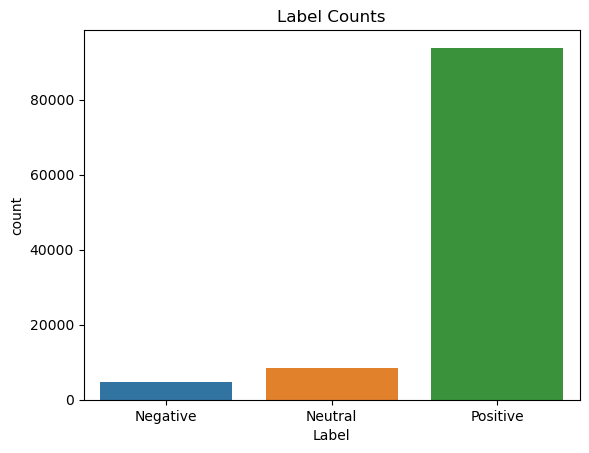

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Change the datatype as "category"
reviews["Label"] = reviews["Label"].astype("category")

# Visualize the Label counts
sns.countplot(reviews["Label"])
plt.title("Label Counts")
plt.show()

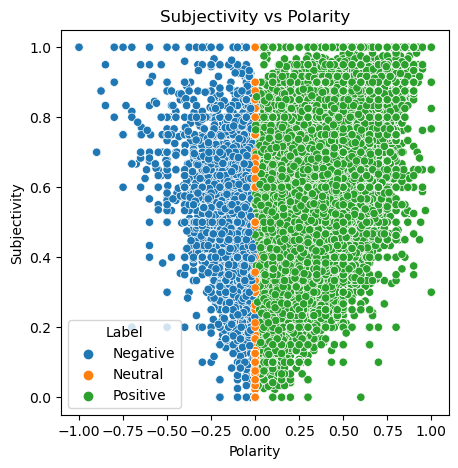

In [11]:
import seaborn as sns
reviews["Subjectivity"] = reviews['review_content'].apply(calculate_subjectivity)

# Visualize the Polarity scores
plt.figure(figsize = (5, 5)) 
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", data=reviews)
plt.title("Subjectivity vs Polarity")
plt.show()

In [12]:
# Import wordcloud
from wordcloud import WordCloud

# Create a new DataFrame called frequencies
frequencies = pd.DataFrame(tfidf.sum(axis=0).T,index=tfidf_vectorizer.get_feature_names(),columns=['total frequency'])

# Sort the words by frequency
frequencies.sort_values(by='total frequency',ascending=False, inplace=True)
# Display the most 20 frequent words
display(frequencies.head(20))

C:\Users\rabiu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,total frequency
course,8779.913748
great,6212.764774
good,4507.219615
really,2532.382066
interesting,2245.919016
excellent,2167.846526
lot,2124.812326
useful,2091.033500
thank,2022.124629
learning,1960.482344


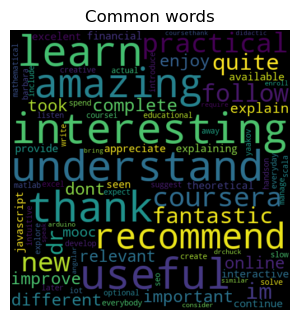

In [13]:
import matplotlib.pyplot as plt

# Join the indexes
frequent_words = " ".join(frequencies.index)+" "

# Initialize the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size =10, max_words=2000, background_color ='black', stopwords= 'english')

# Generate the world clouds for each type of label
nwc = wc.generate(frequent_words)

# Plot the world cloud                     
plt.figure(figsize = (5, 3), facecolor = None) 
plt.imshow(nwc, interpolation="bilinear") 
plt.axis("off") 
plt.title("Common words")
plt.tight_layout(pad = 0) 
plt.show()

In [14]:
reviews.columns

Index(['Id', 'review_content', 'Label', 'Polarity', 'Subjectivity'], dtype='object')

In [17]:
#SVM
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# Split data into training and test sets
train_data, test_data = train_test_split(reviews, test_size=0.2, random_state=42)


train_features = tfidf_vectorizer.fit_transform(train_data['review_content'])
test_features = tfidf_vectorizer.transform(test_data['review_content'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the SVM classifier
clf = SVC(kernel='linear')
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)
print(classification_report(test_target,predictions))

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.88      0.63      0.74       896
           1       0.85      0.90      0.87      1669
           2       0.98      0.99      0.98     18839

    accuracy                           0.96     21404
   macro avg       0.90      0.84      0.86     21404
weighted avg       0.96      0.96      0.96     21404

Accuracy: 0.9636049336572603


In [18]:
#LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Load the data
train_data = reviews
test_data = reviews

# Create the feature matrices
train_features = tfidf_vectorizer.fit_transform(train_data['review_content'])
test_features = tfidf_vectorizer.transform(test_data['review_content'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)

print(classification_report(test_target,predictions))
# Print the accuracy score
print("Accuracy:", accuracy_score(test_target, predictions))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      4694
           1       0.91      0.90      0.91      8444
           2       0.98      0.99      0.99     93880

    accuracy                           0.97    107018
   macro avg       0.95      0.86      0.90    107018
weighted avg       0.97      0.97      0.97    107018

Accuracy: 0.9731353604066606


C:\Users\UseR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
#decision_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize objects
le = LabelEncoder()
tfidf_vectorizer = TfidfVectorizer()

# Assuming 'reviews' is your DataFrame and it has 'review_content' and 'Label' columns.
# Split data into training and test sets
train_data, test_data = train_test_split(reviews, test_size=0.2, random_state=42)

# Vectorize the review content
train_features = tfidf_vectorizer.fit_transform(train_data['review_content'])
test_features = tfidf_vectorizer.transform(test_data['review_content'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)
print(classification_report(test_target,predictions))

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.57      0.52      0.54       896
           1       0.85      0.91      0.88      1669
           2       0.97      0.97      0.97     18839

    accuracy                           0.95     21404
   macro avg       0.80      0.80      0.80     21404
weighted avg       0.95      0.95      0.95     21404

Accuracy: 0.9488880583068585


In [17]:
#Random_forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize objects
le = LabelEncoder()
tfidf_vectorizer = TfidfVectorizer()

# Assuming 'reviews' is your DataFrame and it has 'review_content' and 'Label' columns.
# Split data into training and test sets
train_data, test_data = train_test_split(reviews, test_size=0.2, random_state=42)

# Vectorize the review content
train_features = tfidf_vectorizer.fit_transform(train_data['review_content'])
test_features = tfidf_vectorizer.transform(test_data['review_content'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the Random Forest classifier
clf = RandomForestClassifier()
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)
print(classification_report(test_target,predictions))

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.93      0.21      0.35       896
           1       0.88      0.66      0.75      1669
           2       0.94      0.99      0.96     18839

    accuracy                           0.93     21404
   macro avg       0.92      0.62      0.69     21404
weighted avg       0.93      0.93      0.92     21404

Accuracy: 0.9343580639132872


In [15]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize objects
le = LabelEncoder()
tfidf_vectorizer = TfidfVectorizer()

# Assuming 'reviews' is your DataFrame and it has 'review_content' and 'Label' columns.
# Split data into training and test sets
train_data, test_data = train_test_split(reviews, test_size=0.2, random_state=42)

# Vectorize the review content
train_features = tfidf_vectorizer.fit_transform(train_data['review_content'])
test_features = tfidf_vectorizer.transform(test_data['review_content'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1)
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)
print(classification_report(test_target,predictions))

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.62      0.33      0.43       896
           1       0.68      0.14      0.23      1669
           2       0.90      0.99      0.94     18839

    accuracy                           0.89     21404
   macro avg       0.74      0.48      0.53     21404
weighted avg       0.87      0.89      0.87     21404

Accuracy: 0.893290973649785


In [30]:
#Native Bayes
# Import the necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Split the data into training and testing sets
train_data = reviews[:8000]
test_data = reviews[8000:]

# Vectorize the training and testing data
train_features = tfidf_vectorizer.fit_transform(train_data['review_content'])
test_features = tfidf_vectorizer.transform(test_data['review_content'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)

print(classification_report(test_target,predictions))
# Print the accuracy of the classifier
print("Accuracy:", clf.score(test_features, test_target))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4284
           1       0.86      0.00      0.01      7818
           2       0.88      1.00      0.94     86916

    accuracy                           0.88     99018
   macro avg       0.58      0.33      0.31     99018
weighted avg       0.84      0.88      0.82     99018

Accuracy: 0.8781130703508453


C:\Users\rabiu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rabiu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rabiu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
reviews.head

<bound method NDFrame.head of             Id                                     review_content     Label  \
0            0                                   good interesting  Positive   
1            1  class helpful currently im still learning clas...   Neutral   
2            2  likeprof ta helpful discussion among student q...  Positive   
3            3  easy follow includes lot basic important techn...  Positive   
4            4      really nice teacheri could got point eazliy v  Positive   
...        ...                                                ...       ...   
107013  107013  trendy topic talk expertise field covered area...  Positive   
107014  107014  wonderful simple clear language good instructo...  Positive   
107015  107015            interesting fun course thanks dr quincy  Positive   
107016  107016  broad perspective date information useful link...  Positive   
107017  107017  informative course social financial implicatio...  Negative   

        Polarity  Sub

In [15]:
#LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Load the data
train_data = reviews
test_data = reviews

# Create the feature matrices
train_features = tfidf_vectorizer.fit_transform(train_data['review_content'])
test_features = tfidf_vectorizer.transform(test_data['review_content'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)

print(classification_report(test_target,predictions))
# Print the accuracy score
print("Accuracy:", accuracy_score(test_target, predictions))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      4694
           1       0.91      0.90      0.91      8444
           2       0.98      0.99      0.99     93880

    accuracy                           0.97    107018
   macro avg       0.95      0.86      0.90    107018
weighted avg       0.97      0.97      0.97    107018

Accuracy: 0.9731727372965295


C:\Users\rabiu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\rabiu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rabiu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

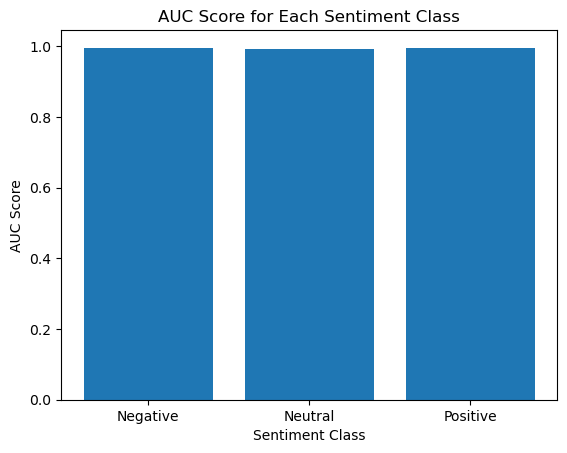

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data (replace this with your actual data)
train_data = reviews
test_data = reviews

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create the feature matrices
train_features = tfidf_vectorizer.fit_transform(train_data['review_content'])
test_features = tfidf_vectorizer.transform(test_data['review_content'])

# Create the target variables
le = LabelEncoder()
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the logistic regression classifier
clf = LogisticRegression(random_state=42, multi_class='ovr')
clf.fit(train_features, train_target)

# Get predicted probabilities for each class
y_prob = clf.predict_proba(test_features)

# Calculate the AUC for each class
auc_scores = []
for class_idx in range(len(le.classes_)):
    class_auc = roc_auc_score(test_target == class_idx, y_prob[:, class_idx])
    auc_scores.append(class_auc)

# Plot the AUC scores for each class
plt.figure()
plt.bar(le.classes_, auc_scores)
plt.xlabel('Sentiment Class')
plt.ylabel('AUC Score')
plt.title('AUC Score for Each Sentiment Class')
plt.show()


C:\Users\rabiu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rabiu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

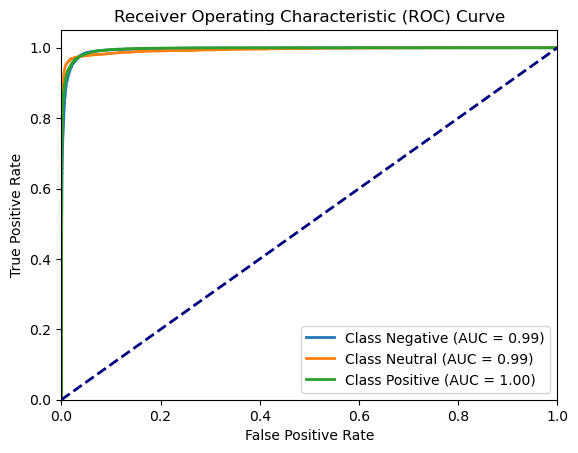

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data (replace this with your actual data)
train_data = reviews
test_data = reviews

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create the feature matrices
train_features = tfidf_vectorizer.fit_transform(train_data['review_content'])
test_features = tfidf_vectorizer.transform(test_data['review_content'])

# Create the target variables
le = LabelEncoder()
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the logistic regression classifier
clf = LogisticRegression(random_state=42, multi_class='ovr')
clf.fit(train_features, train_target)

# Get predicted probabilities for each class
y_prob = clf.predict_proba(test_features)

# Plot the ROC curve for each class
plt.figure()
for class_idx in range(len(le.classes_)):
    fpr, tpr, _ = roc_curve(test_target == class_idx, y_prob[:, class_idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {le.classes_[class_idx]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()